# Overview
This notebook is to check the outputs from tikhonov regressions
There are two major things that we want to check
1. are the medial wall zero values being handled well and indexed? 
2. What is the distribution of the values?
3. can we concatenate the values easily back together? are there issues if running the jobs in chunks?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# directory

In [2]:
mount_dir = 'smb://dartfs/rc/lab/D/DBIC/DBIC/f0042x1/life-encoding/scripts/tikreg-pca/'
mount_dir = '/Volumes/life-encoding/scripts/tikreg-pca'

In [4]:
# parameters
MODEL="visual"
ALIGN="ws"
STIM1="bg"
STIM2="actions"
STIM3="agents"
SUB="sub-rid000024"
RUN=3
HEMI="lh"
NODE=32


In [5]:
sub = 'sub-rid000024'
model = 'visual'
align = 'ws'
feature = 'actions'
hemi = 'lh'
node_range = 32
increment = 20
run = 3
fold_shifted = run + 1


In [6]:
filename = 'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi-{5}_range-620-639.json'.format(
    sub, model, align, feature, fold_shifted, hemi )

In [7]:
n_vertices = 40962
n_proc = 32     # how many cores do we have?
n_medial = {'lh': 3486, 'rh': 3491}

alpha_shape = n_vertices - n_medial[hemi]
zero_df = pd.DataFrame(np.zeros(( n_vertices, 1)))

In [8]:
# output corr .json as niml.dset
## load file
## if numpy array
## 
df_x1 = pd.DataFrame(corr_x1_numpy)

df_x1.rename({0:'index', 1:'corr'}, axis = 'columns', inplace = True)
df_x1['index'] = df_x1['index'].astype(int)
df_x1.set_index('index', inplace = True)
del df_x1.index.name
df_x1.rename({'corr':0}, axis = 'columns', inplace = True)

# merge
zero_df.update(df_x1)

NameError: name 'corr_x1_numpy' is not defined

## medial wall

ind_nonmedial: [620 621 622 623 624 625 626 627 628 629 630 631 632 633]
ind_medial: [634 635 636 637 638 639]

In [10]:
cortical_vertices = {}
for half in ['lh', 'rh']:
    test_ds = mv.niml.read(
        '/dartfs/rc/lab/D/DBIC/DBIC/life_data/niml/ws.{0}.niml.dset'.format(half))
    cortical_vertices[half] = np.ones((n_vertices))
    cortical_vertices[half][np.sum(
        test_ds.samples[1:, :] != 0, axis=0) == 0] = 0
med_wall_ind = np.where(cortical_vertices[hemi] == 0)[0]


NameError: name 'mv' is not defined

In [11]:
med_df = pd.DataFrame(med_wall_ind)
med_df.rename({0:'index'}, axis = 'columns', inplace = True)
med_df['values'] = 0
med_df['index'] = med_df['index'].astype(int)
med_df.set_index('index', inplace = True)
del med_df.index.name
med_df.rename({'values':0}, axis = 'columns', inplace = True)


NameError: name 'med_wall_ind' is not defined

In [ ]:
zero_df.update(med_df)

In [ ]:
# pandas dataframe as numpy
output = zero_df[0].to_list()
out_x1 = np.transpose(output)

In [ ]:
# out1 = np.zeros(
#     (corr_x1.shape[0] + med_wall_ind.shape[0]), dtype=np.dtype(corr_x1).type)
# out1[cortical_vertices[hemi] == 1] = corr_x1
mv.niml.write(os.path.join(mount_dir, 'sample_data'
                           'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi_{5}.niml.dset'.format(
    sub, model, align, feature, fold_shifted, hemi)), out_x1[None, :])
# sub, model, align, feature, fold_shifted, hemi

# mv.niml.write(os.path.join(directory, 'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi_{5}.niml.dset'.format(test_p, model, align, stimfile1, fold_shifted, hemi)), out1[None,:])

# read and plot

In [12]:
test_ds = mv.niml.read('/Volumes/life-encoding/scripts/tikreg-pca/sample_data/corrcoef_sub-rid000024_model-visual_align-ws_feature-actions_foldshifted-4_hemi_lh.niml.dset')


NameError: name 'mv' is not defined

In [6]:
from nilearn.plotting import plot_surf
main_dir = '/Users/h/suma-fsaverage6'
fsaverage_gii_L = os.path.join(main_dir , 'lh.inf_50.gii')
fsaverage_gii_R = os.path.join(main_dir , 'rh.inf_50.gii')
# fsaverage_inflated_L = os.path.join(main_dir , 'fs_templates', 'lh.inflated.gii')
# fsaverage_inflated_R = os.path.join(main_dir , 'fs_templates', 'rh.inflated.gii')

figure, axes = plt.subplots(3,2,subplot_kw={'projection': '3d'},figsize = (12,20))

# plot_surf(fsaverage_gii,np.mean(group_ds,axis = 0),colorbar = True)
plot_surf(fsaverage_inflated_L,mean_cltax_behtask_L, 
          title='Taxonomy classification \n behavior attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[0][0])
plot_surf(fsaverage_inflated_R,mean_cltax_behtask_R,  colorbar = True, 
          title='Taxonomy classification \n behavior attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[0][1])
plot_surf(fsaverage_inflated_L,mean_cltax_taxtask_L, 
          title='Taxonomy classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[1][0])
plot_surf(fsaverage_inflated_R,mean_cltax_taxtask_R,  colorbar = True, 
          title='Taxonomy classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'lateral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[1][1])
plot_surf(fsaverage_inflated_L,mean_cltax_taxtask_L,
          title='Taxonomy classification \n taxonomy attention task\n left hemi', 
          hemi='left', view = 'ventral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[2][0])
plot_surf(fsaverage_inflated_R,mean_cltax_taxtask_R,  colorbar = True, 
          title='Taxonomy classification \n taxonomy attention task\n right hemi', 
          hemi='right', view = 'ventral', vmin=.20, vmax=.35, cmap = 'inferno',axes=axes[2][1])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'corrcoef_sub-rid000024_model-visual_align-ws_feature-actions_foldshifted-4_hemi-lh_range-620-639.json'

In [ ]:
mv.niml.write(os.path.join(mount_dir, 'corrcoef_{0}_model-{1}_align-{2}_feature-{3}_foldshifted-{4}_hemi_{5}.niml.dset'.format(
    test_p, model, align, stimfile1, fold_shifted, hemi)), out1[None, :])

# plot json for meeting 0525

* Sam selected a number of nodes. plot the hyperparameters for that given node

https://stackoverflow.com/questions/66016045/python-dataframe-plot-a-bar-chart-for-data-frame-with-grouped-by-columns-at-l/66121322#66121322

https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html

In [2]:
vertices = {'early visual cortex': [21569, 27912, 35942, 28601],
            'early auditory cortex': [38080, 9280, 12636, 20646],
            'lateral occipitotemporal cortex': [38574, 38669, 27613, 15174],
            'ventral temporal cortex': [15751, 34345, 2753, 40419],
            'lateral parietal cortex': [30480, 19519, 26504, 36410],
            'premotor cortex': [32743, 30278, 14970, 3668]}

In [3]:
pd.DataFrame.from_dict(vertices)
df = pd.DataFrame(vertices.items(),columns = ['regions','node'])
lst_col = 'node'

roi = pd.DataFrame({
      col:np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns]
roi

,regions,node
0,early visual cortex,21569
1,early visual cortex,27912
2,early visual cortex,35942
3,early visual cortex,28601
4,early auditory cortex,38080
5,early auditory cortex,9280
6,early auditory cortex,12636
7,early auditory cortex,20646
8,lateral occipitotemporal cortex,38574
9,lateral occipitotemporal cortex,38669


## early visual cortex

In [6]:
# vertices = {'early visual cortex': [**21569**, **27912**, **35942**, **28601**],
#             'early auditory cortex': [**38080**, **9280**, **12636**, **20646**],
#             'lateral occipitotemporal cortex': [**38574, **38669**, **27613, **15174],
#             'ventral temporal cortex': [15751 **34345, **2753**, 40419],
#             'lateral parietal cortex': [**30480, 19519, 26504, **36410**],
#             'premotor cortex': [**32743**, **30278**, **14970**, 3668]}


hyper_json = [[21569.0, 1.0],[27912.0, 1.0],  [35942.0, 1.0], [28601.0, 1.0],
             [38080.0, 1.0], [9280.0, 1.0], [12636.0, 1.0], [20646.0, 3.3598182862837818],
             [38574.0, 1.0], [38669.0, 428.1332398719391], [27613.0, 428.1332398719391], [15174.0, 1.0],
             [15171.0, 1.0], [34345.0, 1.0], [2753.0, 4832.930238571752],
             [30480.0, 1.8329807108324359],[36410.0, 29763.51441631319],
             [32743.0, 1.0],[30278.0, 1.0],[14970.0, 1.8329807108324359]]

agents_json = [[21569.0, 0.04342571562345652], [27912.0, -0.13320569130844742],[35942.0, -0.06465313399742195],[28601.0, -0.05834370685620155],
              [38080.0, 0.057595752269265936], [9280.0, 0.015020512432738616],[12636.0, 0.044528992789470034],[20646.0, 0.08480455525147104],
              [38574.0, -0.0012994965002091768],[38669.0, 0.04401245075988246],[27613.0, 0.09869693556191066],[15174.0, -0.030218129134447488],
             [34345.0, -0.025770327612107936],[2753.0, 0.1512806898621991],
               [30480.0, -0.009429304489954354],[36410.0, 0.1449140533883221],
               [32743.0, -0.0676294557444341],[30278.0, 0.01776346411596614],[14970.0, -0.03156823273231511]]

bg_json = [[21569.0, 0.05873300924851848], [27912.0, 0.008628465840552156],[35942.0, 0.08776765642952992], [28601.0, 0.06264416825510537],
          [38080.0, -0.016602546582315924],[9280.0, -0.08737000963593376],[12636.0, -0.025019014716758686],[20646.0, -0.04072216645198509],
          [38574.0, 0.14813894613842063],[38669.0, -0.04314050879634135],[27613.0, -0.02029906338634783],[15174.0, -0.017195527887777846],
          [34345.0, -0.07885578657933018],[2753.0, -0.0034318426991847323],
               [30480.0, -0.028182198636710988],[36410.0, -0.015050925017205211],
               [32743.0, -0.04245502158149861],[30278.0, -0.05511775355855007],[14970.0, -0.12310972688746255]]
actions_json = [[21569.0, 0.0336940325646155], [27912.0, 0.022356028318831427],[35942.0, -0.0528631307287752], [28601.0, -0.04033288779170042],
               [38080.0, 0.004358724958268423],[9280.0, 0.019448179976400644],[12636.0, 0.01988664911245128],[20646.0, -0.08561387983847069],
               [38574.0, -0.05653286731680951],[38669.0, -0.018090916852150377],[27613.0, 0.04912544289175997],[15174.0, -0.1281117638661347],
               [34345.0, 0.04352393624119258], [2753.0, -0.1236776073390186],
                [30480.0, 0.039943395749458994], [36410.0, 0.13281962517620996],
               [32743.0, 0.15563597779805344],[30278.0, 0.004348498646345359],[14970.0, -0.04721901328389317]]




In [7]:
hyper_df = pd.DataFrame(hyper_json)
agents_df = pd.DataFrame(agents_json)
bg_df = pd.DataFrame(bg_json)
actions_df = pd.DataFrame(actions_json)
hyper_df.rename({0:'node', 1:'hyperparameter'}, axis = 'columns', inplace = True)
agents_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)
bg_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)
actions_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)

In [8]:
agents_merged = agents_df.merge(hyper_df, on=["node"])
bg_merged = bg_df.merge(hyper_df, on=["node"])
actions_merged = actions_df.merge(hyper_df, on=["node"])



In [53]:
# select ONLY non-medial nodes
hyper_roi = hyper_df.merge(roi, how='inner', on='node')
agents_nonmedial = agents_merged.merge(roi, how='inner', on='node')
bg_nonmedial = bg_merged.merge(roi, how='inner', on='node')
actions_nonmedial = actions_merged.merge(roi, how='inner', on='node')


In [54]:
#hyper_roi.set_index([ 'regions', 'node'], inplace=True)

hyper_roi.head()

,node,hyperparameter,regions
0,21569.0,1.0,early visual cortex
1,27912.0,1.0,early visual cortex
2,35942.0,1.0,early visual cortex
3,28601.0,1.0,early visual cortex
4,38080.0,1.0,early auditory cortex


## plot 1) hyper parameter value per node

In [56]:
df

hyperparameter
regions                         node                   
early visual cortex             21569.0        1.000000
                                27912.0        1.000000
                                35942.0        1.000000
                                28601.0        1.000000
early auditory cortex           38080.0        1.000000
                                9280.0         1.000000
                                12636.0        1.000000
                                20646.0        3.359818
lateral occipitotemporal cortex 38574.0        1.000000
                                38669.0      428.133240
                                27613.0      428.133240
                                15174.0        1.000000
ventral temporal cortex         34345.0        1.000000
                                2753.0      4832.930239
lateral parietal cortex         30480.0        1.832981
                                36410.0    29763.514416
premotor cortex                 32743.0        1.000000
                                30278.0        1.000000
                                14970.0        1.832981

In [60]:
zone

NameError: name 'zone' is not defined

In [61]:
zones

Float64Index([ 2753.0,  9280.0, 12636.0, 14970.0, 15174.0, 20646.0, 21569.0,
              27613.0, 27912.0, 28601.0, 30278.0, 30480.0, 32743.0, 34345.0,
              35942.0, 36410.0, 38080.0, 38574.0, 38669.0],
             dtype='float64', name='node')

In [59]:
print(zone)
plots_width_ratios = [df.xs(zone).index.size for zone in zones]


NameError: name 'zone' is not defined

In [86]:
    xlabels = [name.replace(' ', '\n') if len(name) > 10 else name
                  for name in zones]

In [87]:
xlabels

['early\nauditory\ncortex',
 'early\nvisual\ncortex',
 'lateral\noccipitotemporal\ncortex',
 'lateral\nparietal\ncortex',
 'premotor\ncortex',
 'ventral\ntemporal\ncortex']

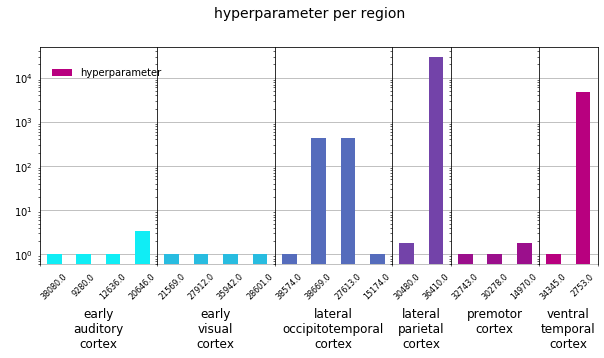

In [100]:
df = hyper_roi
df = df.set_index(['regions', 'node'])
# Create figure with a subplot for each factory zone with a relative width
# proportionate to the number of factories
zones = df.index.levels[0]
nplots = zones.size
plots_width_ratios = [df.xs(zone).index.size*2 for zone in zones]
fig, axes = plt.subplots(nrows=1, ncols=nplots, sharey=True, figsize=(10, 4),
                         gridspec_kw = dict(width_ratios=plots_width_ratios, wspace=0))
colors = ['#10EDF5', '#28BCE0', '#556CBC', '#7343A9', '#9B0F8C', '#B8007F']
# Loop through array of axes to create grouped bar chart for each factory zone
alpha = 0.3 # used for grid lines, bottom spine and separation lines between zones
for zone, ax, clr in zip(zones, axes, colors):
    # Create bar chart with grid lines and no spines except bottom one
    df.xs(zone).plot.bar(ax=ax, legend=None, zorder=2, logy = True, color = clr)
    ax.grid(axis='y', zorder=1, color='black', alpha=alpha)
#     for spine in ['top', 'left', 'right']:
#         ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_alpha(alpha)
    
    # Set and place x labels for factory zones
    xlabels = [name.replace(' ', '\n') if len(name) > 10 else name
                  for name in zones]
#     if len(zone) > 10:
#         zone =  zone.replace(' ', '\n')
#     else:
#         zone
    xlabels = [zone.replace(' ', '\n') if len(zone) > 10 else zone][0]  
    ax.set_xlabel(xlabels, fontsize = 12)
#     ax.set_xlabel(xlabel)
    ax.xaxis.set_label_coords(x=0.5, y=-0.2)
    
    # Format major tick labels for factory names: note that because this figure is
    # only about 10 inches wide, I choose to rewrite the long names on two lines.
#     ticklabels = [name.replace(' ', '\n') if len(name) > 10 else name
#                   for name in df.xs(zone).index]
    ticklabels = df.xs(zone).index
    ax.set_xticklabels(ticklabels, rotation=45, ha='center',fontsize=8)
    ax.tick_params(axis='both', length=0, pad=7)
    
    # Set and format minor tick marks for separation lines between zones: note
    # that except for the first subplot, only the right tick mark is drawn to avoid
    # duplicate overlapping lines so that when an alpha different from 1 is chosen
    # (like in this example) all the lines look the same
    if ax.is_first_col():
        ax.set_xticks([*ax.get_xlim()], minor=True)
    else:
        ax.set_xticks([ax.get_xlim()[1]], minor=True)
#     ax.tick_params(which='minor', length=55, width=0.8, color=[0, 0, 0, alpha])

# Add legend using the labels and handles from the last subplot
#fig.legend(*ax.get_legend_handles_labels(), frameon=False, loc=(0.08, 0.77))

fig.suptitle('hyperparameter per region', y=1.02, size=14);

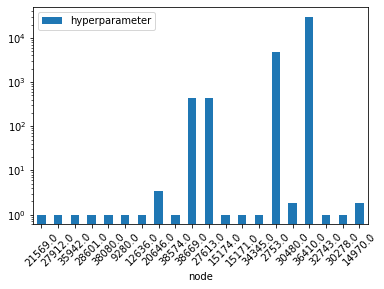

In [20]:
# b = actions_nonmedial.plot.bar(x='node', y='hyperparameter', rot=45, )

b = hyper_df.plot.bar(x='node', y='hyperparameter', rot=45, )
b.set_yscale('log')


## plot 2) correlation coefficient per node

In [124]:
def plot_corr_per_region(dataframe, title):
#     df = actions_nonmedial
    dataframe = dataframe[['node', 'corr', 'regions']]
#     fig, axes = plt.subplots() 
    new_df = dataframe.set_index(['regions', 'node'])
    # Create figure with a subplot for each factory zone with a relative width
    # proportionate to the number of factories
    zones = new_df.index.levels[0]
    nplots = zones.size
    plots_width_ratios = [new_df.xs(zone).index.size*2 for zone in zones]
    fig, axes = plt.subplots(nrows=1, ncols=nplots, sharey=True, figsize=(10, 4),
                             gridspec_kw = dict(width_ratios=plots_width_ratios, wspace=0))
    colors = ['#10EDF5', '#28BCE0', '#556CBC', '#7343A9', '#9B0F8C', '#B8007F']
    # Loop through array of axes to create grouped bar chart for each factory zone
    alpha = 0.3 # used for grid lines, bottom spine and separation lines between zones
    for zone, ax, clr in zip(zones, axes, colors):
        # Create bar chart with grid lines and no spines except bottom one
        new_df.xs(zone).plot.bar(ax=ax, legend=None, zorder=2,  color = clr)
        ax.grid(axis='y', zorder=1, color='black', alpha=alpha)

        ax.spines['bottom'].set_alpha(alpha)

        # Set and place x labels for factory zones
#         xlabels = [name.replace(' ', '\n') if len(name) > 10 else name
#                       for name in zones]

        xlabels = [zone.replace(' ', '\n') if len(zone) > 10 else zone][0]  
        ax.set_xlabel(xlabels, fontsize = 12)
        ax.set_ylabel('correlation coefficient', fontsize = 12)
    #     ax.set_xlabel(xlabel)
        ax.xaxis.set_label_coords(x=0.5, y=-0.2)

        ticklabels = new_df.xs(zone).index
        ax.set_xticklabels(ticklabels, rotation=45, ha='center',fontsize=8)
        ax.tick_params(axis='both', length=0, pad=7)


        if ax.is_first_col():
            ax.set_xticks([*ax.get_xlim()], minor=True)
        else:
            ax.set_xticks([ax.get_xlim()[1]], minor=True)
    #     ax.tick_params(which='minor', length=55, width=0.8, color=[0, 0, 0, alpha])

    # Add legend using the labels and handles from the last subplot
    #fig.legend(*ax.get_legend_handles_labels(), frameon=False, loc=(0.08, 0.77))

    fig.suptitle(title, y=1.02, size=14);
    plt.show()

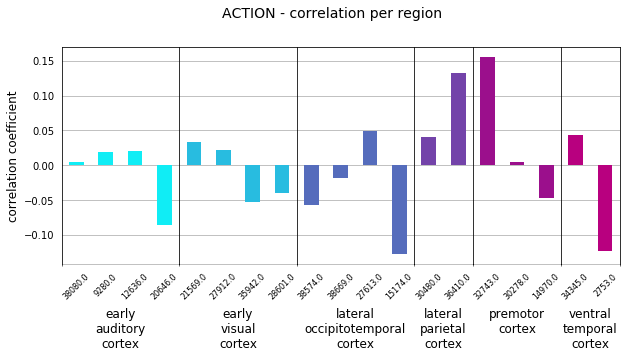

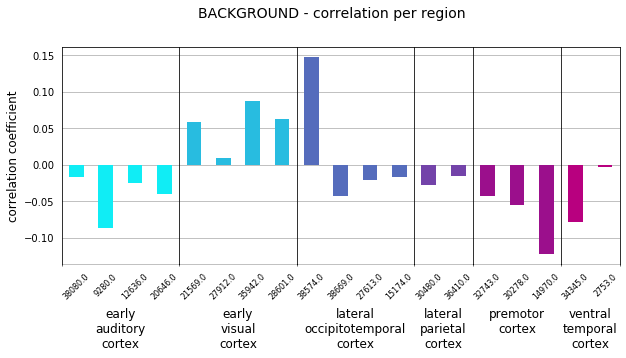

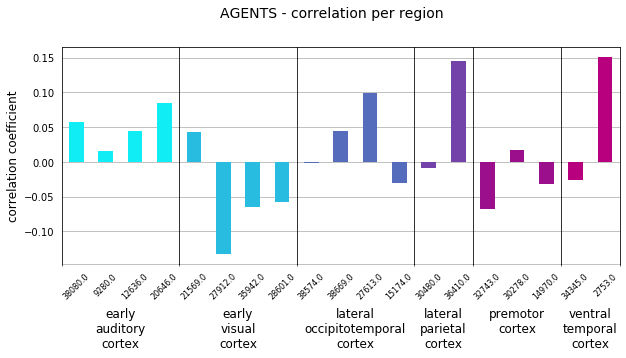

In [126]:
ax = plot_corr_per_region(actions_nonmedial, 'ACTION - correlation per region')
ax = plot_corr_per_region(bg_nonmedial, 'BACKGROUND - correlation per region')
ax = plot_corr_per_region(agents_nonmedial, 'AGENTS - correlation per region')

## plot 3) stacked

In [127]:
actions_nonmedial['feature'] = 'action'
bg_nonmedial['feature'] = 'background'
agents_nonmedial['feature'] = 'agent'
stack_df = pd.concat([actions_nonmedial, bg_nonmedial, agents_nonmedial])
#sdf =  stack_df.rename({0:'node', 1:'correlation'}, axis = 'columns')

In [133]:
stack_df['regions']

0                 early visual cortex
1                 early visual cortex
2                 early visual cortex
3                 early visual cortex
4               early auditory cortex
5               early auditory cortex
6               early auditory cortex
7               early auditory cortex
8     lateral occipitotemporal cortex
9     lateral occipitotemporal cortex
10    lateral occipitotemporal cortex
11    lateral occipitotemporal cortex
12            ventral temporal cortex
13            ventral temporal cortex
14            lateral parietal cortex
15            lateral parietal cortex
16                    premotor cortex
17                    premotor cortex
18                    premotor cortex
0                 early visual cortex
1                 early visual cortex
2                 early visual cortex
3                 early visual cortex
4               early auditory cortex
5               early auditory cortex
6               early auditory cortex
7           

In [139]:
stack_df.head()

,node,corr,hyperparameter,regions,feature
0,21569.0,0.033694,1.0,early visual cortex,action
1,27912.0,0.022356,1.0,early visual cortex,action
2,35942.0,-0.052863,1.0,early visual cortex,action
3,28601.0,-0.040333,1.0,early visual cortex,action
4,38080.0,0.004359,1.0,early auditory cortex,action


In [147]:
df.regions.unique()

array(['early visual cortex', 'early auditory cortex',
       'lateral occipitotemporal cortex', 'ventral temporal cortex',
       'lateral parietal cortex', 'premotor cortex'], dtype=object)

In [157]:
def plot_corr_feature_per_region(dataframe, title, region, clr):
#     df = actions_nonmedial
    dataframe = dataframe[['feature','node', 'corr', 'regions']]
    dataframe_sub = dataframe[dataframe["regions"] == region]
#     fig, axes = plt.subplots() 
    new_df = dataframe_sub.set_index(['feature', 'node'])
    # Create figure with a subplot for each factory zone with a relative width
    # proportionate to the number of factories
    zones = new_df.index.levels[0]
#     print(zones)
    nplots = zones.size
    plots_width_ratios = [new_df.xs(zone).index.size*2 for zone in zones]
    fig, axes = plt.subplots(nrows=1, ncols=nplots, sharey=True, figsize=(10, 4),
                             gridspec_kw = dict(width_ratios=plots_width_ratios, wspace=0))
#     colors = ['#10EDF5', '#28BCE0', '#556CBC', '#7343A9', '#9B0F8C', '#B8007F']
    # Loop through array of axes to create grouped bar chart for each factory zone
    alpha = 0.3 # used for grid lines, bottom spine and separation lines between zones
    for zone, ax in zip(zones, axes):
        # Create bar chart with grid lines and no spines except bottom one
        new_df.xs(zone).plot.bar(ax=ax, legend=None, zorder=2,  color = clr)
        ax.grid(axis='y', zorder=1, color='black', alpha=alpha)

        ax.spines['bottom'].set_alpha(alpha)

        # Set and place x labels for factory zones
#         xlabels = [name.replace(' ', '\n') if len(name) > 10 else name
#                       for name in zones]

        xlabels = [zone.replace(' ', '\n') if len(zone) > 10 else zone][0]  
        ax.set_xlabel(xlabels, fontsize = 12)
        ax.set_ylabel('correlation coefficient', fontsize = 12)
    #     ax.set_xlabel(xlabel)
        ax.xaxis.set_label_coords(x=0.5, y=-0.2)

        ticklabels = new_df.xs(zone).index
        ax.set_xticklabels(ticklabels, rotation=45, ha='center',fontsize=8)
        ax.tick_params(axis='both', length=0, pad=7)
        ax.set_ylim(-0.15,0.15)


        if ax.is_first_col():
            ax.set_xticks([*ax.get_xlim()], minor=True)
        else:
            ax.set_xticks([ax.get_xlim()[1]], minor=True)
    #     ax.tick_params(which='minor', length=55, width=0.8, color=[0, 0, 0, alpha])

    # Add legend using the labels and handles from the last subplot
    #fig.legend(*ax.get_legend_handles_labels(), frameon=False, loc=(0.08, 0.77))

    fig.suptitle(title, y=1.02, size=20);
    plt.show()

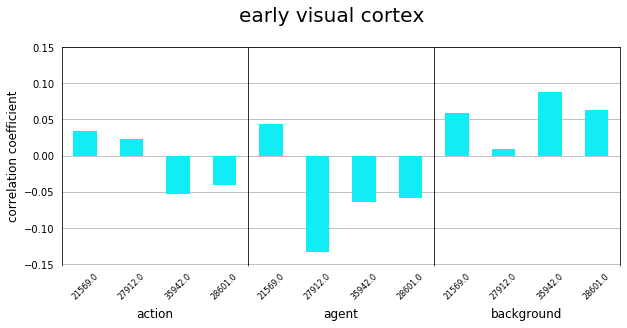

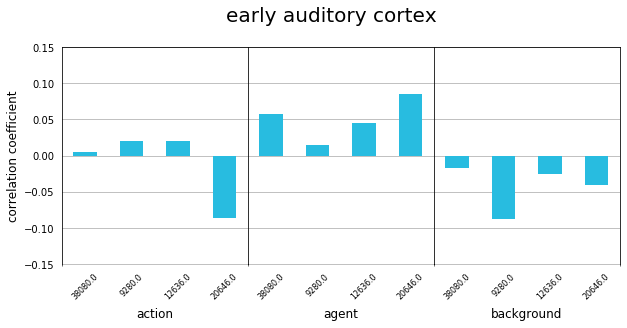

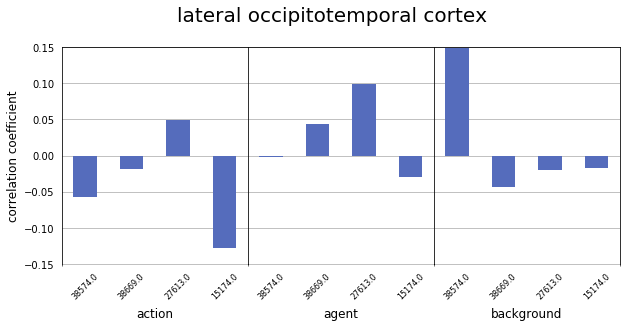

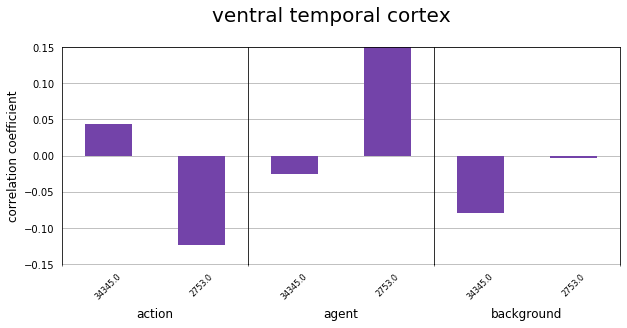

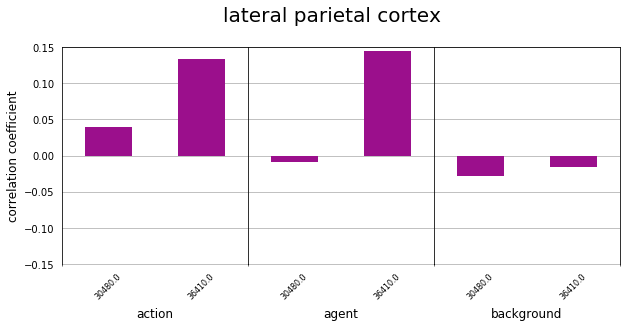

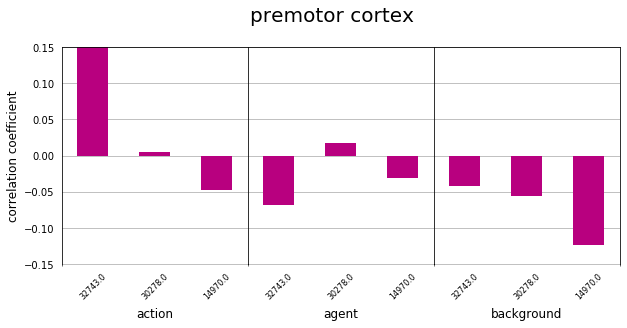

In [158]:
colors = ['#10EDF5', '#28BCE0', '#556CBC', '#7343A9', '#9B0F8C', '#B8007F']
for region, clr in zip(list(df.regions.unique()), colors):
    plot_corr_feature_per_region(stack_df,region,region,clr)

Text(0, 0.5, 'frequency')

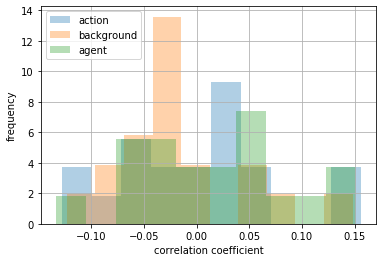

In [34]:
# https://stackoverflow.com/questions/48238305/bar-plot-with-groupby

for g in pd.unique(stack_df['feature']):
    stack_df.loc[stack_df['feature']==g,'corr'].hist(alpha=0.35,
                                             label=g,density=True)
plt.legend(loc='upper left')
plt.xlabel('correlation coefficient')
plt.ylabel('frequency')


# sdf.groupby('feature')['correlation'].hist(bins=10, alpha=0.65, density=True, label=g)

## plot 4) relationsihp betwen hyperalignment

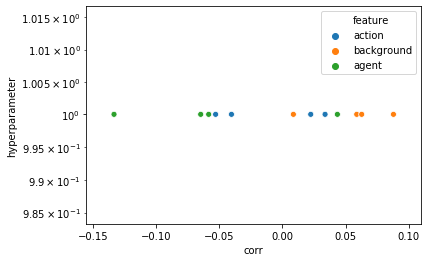

In [159]:


y =sns.scatterplot(x="corr", y="hyperparameter",
              hue="feature",
              data=stack_df[stack_df['regions'] == 'early visual cortex']);
y.set_yscale('log')

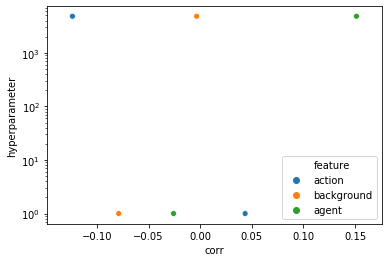

In [160]:
y =sns.scatterplot(x="corr", y="hyperparameter",
              hue="feature",
              data=stack_df[stack_df['regions'] == 'ventral temporal cortex']);
y.set_yscale('log')

# plot json for meeting: 0511

* list the non-medial valid nodes
* load the json files from tikreg result
* transform them into pandas
* add informative columns - node, hyperparameter
* merge pandas so that - node, hyperparmeter, correlation is in one space
* remove medical nodes OR grab the intersection of the non-medial nodes

In [9]:
non_medial_list = [620,621, 622, 623,624, 625, 626, 627 ,628 ,629 ,630, 631, 632, 633]
non_medial = pd.DataFrame(non_medial_list)
non_medial.rename({0:'node'}, axis = 'columns', inplace = True)

In [10]:
hyper_json = [[620.0, 695.1927961775606], [621.0, 78.47599703514611], [622.0, 12.742749857031335], [623.0, 1000.0], [624.0, 1.4384498882876628], [625.0, 1.0], [626.0, 1.0], [627.0, 1.0], [628.0, 1.0], [629.0, 1.4384498882876628], [630.0, 1.4384498882876628], [631.0, 1.0], [632.0, 1.0], [633.0, 1.4384498882876628], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]
j
agents_json = [[620.0, 0.10695612306621441], [621.0, 0.02968975453972098], [622.0, -0.01837641756051391], [623.0, -0.00027822419442339637], [624.0, -0.041449768840175844], [625.0, 0.013350879654291985], [626.0, -0.02213769089764677], [627.0, 0.054777928374611075], [628.0, 0.11240840245410645], [629.0, 0.08477064818671734], [630.0, 0.07152715799854355], [631.0, 0.026399032803624014], [632.0, 0.04486676696517466], [633.0, 0.05565418267073641], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]
bg_json = [[620.0, 0.03444762999853621], [621.0, 0.08013541125452966], [622.0, -0.06196424353521833], [623.0, 0.006152089603711072], [624.0, -0.018681086785922812], [625.0, -0.003495495478741341], [626.0, 0.056946616101909805], [627.0, 0.06845853670717546], [628.0, 0.018831174087128002], [629.0, -0.09460541406702505], [630.0, 0.10875650126471159], [631.0, -0.06498809761530627], [632.0, -0.05859987731663386], [633.0, -0.015436353050162265], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]
actions_json = [[620.0, 0.05781036701516131], [621.0, 0.020910933548079505], [622.0, -0.06086380851948953], [623.0, -0.032483329765095346], [624.0, 0.025221257380514863], [625.0, -0.10647690350526494], [626.0, 0.07006317700509616], [627.0, -0.07271005956925813], [628.0, -0.17063244391304386], [629.0, -0.047108950297373664], [630.0, 0.1388804285083073], [631.0, -0.06623534866286851], [632.0, -0.06983595928063858], [633.0, 0.02012266370985323], [634.0, 0.0], [635.0, 0.0], [636.0, 0.0], [637.0, 0.0], [638.0, 0.0], [639.0, 0.0]]

In [11]:
hyper_df = pd.DataFrame(hyper_json)
agents_df = pd.DataFrame(agents_json)
bg_df = pd.DataFrame(bg_json)
actions_df = pd.DataFrame(actions_json)
hyper_df.rename({0:'node', 1:'hyperparameter'}, axis = 'columns', inplace = True)
agents_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)
bg_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)
actions_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)

In [12]:
agents_merged = agents_df.merge(hyper_df, on=["node"])
bg_merged = bg_df.merge(hyper_df, on=["node"])
actions_merged = actions_df.merge(hyper_df, on=["node"])



In [13]:
# select ONLY non-medial nodes
agents_nonmedial = agents_merged.merge(non_medial, how='inner', on='node')
bg_nonmedial = bg_merged.merge(non_medial, how='inner', on='node')
actions_nonmedial = actions_merged.merge(non_medial, how='inner', on='node')


In [14]:
actions_nonmedial.head()

,node,corr,hyperparameter
0,620.0,0.057810,695.192796
1,621.0,0.020911,78.475997
2,622.0,-0.060864,12.742750
3,623.0,-0.032483,1000.000000
4,624.0,0.025221,1.438450


In [15]:
agents_nonmedial.head()

,node,corr,hyperparameter
0,620.0,0.106956,695.192796
1,621.0,0.029690,78.475997
2,622.0,-0.018376,12.742750
3,623.0,-0.000278,1000.000000
4,624.0,-0.041450,1.438450


## plot 1) hyper parameter value per node

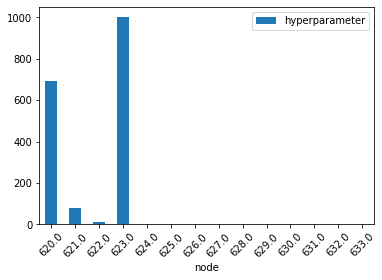

In [16]:
# ax = hdf.hist( column =, bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
#ax = agents_merged.plot.bar(x='node', y='hyperparameter', rot=45, )
b = actions_nonmedial.plot.bar(x='node', y='hyperparameter', rot=45, )
#c = actions_merged.plot.bar(x='node', y='hyperparameter', rot=45, )


## plot 2) correlation coefficient per node

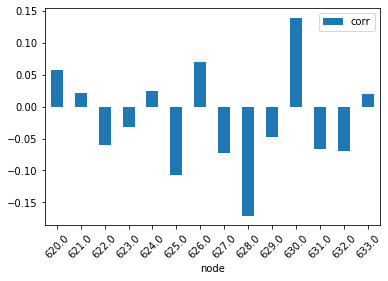

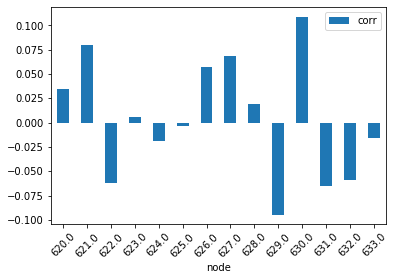

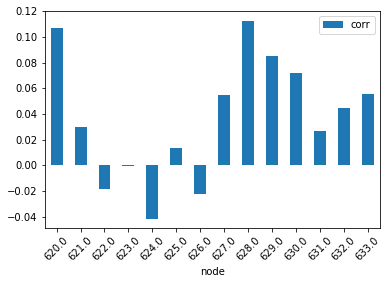

In [17]:
ax = actions_nonmedial.plot.bar(x='node', y='corr', rot=45,)
ax = bg_nonmedial.plot.bar(x='node', y='corr', rot=45,)
ax = agents_nonmedial.plot.bar(x='node', y='corr', rot=45,)

## plot 3) stacked

In [18]:
actions_nonmedial['feature'] = 'action'
bg_nonmedial['feature'] = 'background'
agents_nonmedial['feature'] = 'agent'
stack_df = pd.concat([actions_nonmedial, bg_nonmedial, agents_nonmedial])
#sdf =  stack_df.rename({0:'node', 1:'correlation'}, axis = 'columns')

In [19]:
stack_df.head()

,node,corr,hyperparameter,feature
0,620.0,0.057810,695.192796,action
1,621.0,0.020911,78.475997,action
2,622.0,-0.060864,12.742750,action
3,623.0,-0.032483,1000.000000,action
4,624.0,0.025221,1.438450,action


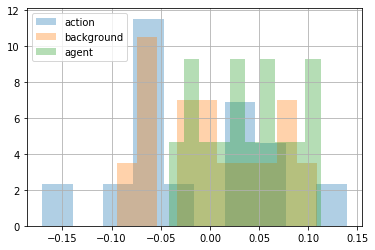

In [20]:
# https://stackoverflow.com/questions/48238305/bar-plot-with-groupby

for g in pd.unique(stack_df['feature']):
    stack_df.loc[stack_df['feature']==g,'corr'].hist(alpha=0.35,
                                             label=g,density=True)
plt.legend(loc='upper left')


# sdf.groupby('feature')['correlation'].hist(bins=10, alpha=0.65, density=True, label=g)

## relationship between hyperparameter and correlation coefficient

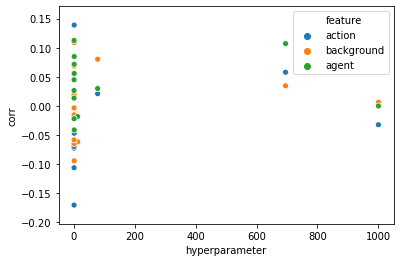

In [21]:
# ax2 = stack_df.plot.scatter(x='hyperparameter',
#                       y='corr',
#                       c='feature',
#                       colormap='viridis')

g =sns.scatterplot(x="hyperparameter", y="corr",
              hue="feature",
              data=stack_df);
# g.set(xscale="log");

In [23]:
# https://stackoverflow.com/questions/48238305/bar-plot-with-groupby

for g in pd.unique(sdf['feature']):
    sdf.loc[sdf['feature']==g,'correlation'].hist(alpha=0.35,
                                             label=g,density=True)
plt.legend(loc='upper left')


# sdf.groupby('feature')['correlation'].hist(bins=10, alpha=0.65, density=True, label=g)

NameError: name 'sdf' is not defined

# node from LOC 0518

## plot reference
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

In [24]:
non_medial_list = [21600, 21601, 21602, 21603, 21604, 21605, 21606, 21607, 21608, 21609, 21610, 21611,
 21612, 21613, 21614, 21615, 21616, 21617, 21618, 21619]
non_medial = pd.DataFrame(non_medial_list)
non_medial.rename({0:'node'}, axis = 'columns', inplace = True)

In [25]:
hyper_json = [[21600.0, 1.0], [21601.0, 1.0], [21602.0, 1.0], [21603.0, 1.0], [21604.0, 1.8329807108324359], [21605.0, 1.0], [21606.0, 1.0], [21607.0, 1.0], [21608.0, 1.0], [21609.0, 1.0], [21610.0, 127.42749857031335], [21611.0, 233.57214690901213], [21612.0, 37.926901907322495], [21613.0, 1.0], [21614.0, 1.0], [21615.0, 1.0], [21616.0, 1.0], [21617.0, 784.7599703514607], [21618.0, 4832.930238571752], [21619.0, 4832.930238571752]]

agents_json = [[21600.0, 0.0020654794655477833], [21601.0, 0.03524745170528604], [21602.0, -0.024751760090916227], [21603.0, -0.011750966036402508], [21604.0, -0.018224847271316662], [21605.0, -0.05257653901239299], [21606.0, -0.03315024283371173], [21607.0, 0.034750331702608], [21608.0, 0.042700897690649504], [21609.0, 0.05270972089209599], [21610.0, 0.040361261503911526], [21611.0, -0.0260599924227575], [21612.0, 0.001073302096629109], [21613.0, -0.03522812563830022], [21614.0, 0.027061209283653662], [21615.0, 0.06277921039057018], [21616.0, -0.009910057242161718], [21617.0, 0.16218149135656285], [21618.0, 0.1798868339064156], [21619.0, 0.17805475429221654]]
bg_json = [[21600.0, 0.038390188475820125], [21601.0, -0.02763494952701908], [21602.0, 0.05385366035991715], [21603.0, 0.06928474889983045], [21604.0, 0.0752464784519902], [21605.0, 0.06557437302461004], [21606.0, 0.09914702141828584], [21607.0, 0.014854353607596793], [21608.0, 0.07762405777692115], [21609.0, 0.0780040957131327], [21610.0, 0.061734436276567405], [21611.0, 0.07525043594312254], [21612.0, 0.0690803657507335], [21613.0, 0.018608261265104255], [21614.0, -0.0035499558722943097], [21615.0, -0.025355175425914776], [21616.0, 0.06599946648917296], [21617.0, 0.07214324488232941], [21618.0, 0.07878703616901396], [21619.0, 0.06186661556474535]]
actions_json = [[21600.0, 0.07451195479925381], [21601.0, 0.11947535180460259], [21602.0, -0.10919544884835716], [21603.0, -0.04701672821854264], [21604.0, -0.09139703904696418], [21605.0, -0.06317710466047474], [21606.0, -0.10242823760809731], [21607.0, -0.09293668913414466], [21608.0, -0.07102190440750146], [21609.0, -0.08110313766200762], [21610.0, 0.0569570581086783], [21611.0, 0.0373787008696041], [21612.0, 0.021717177250048864], [21613.0, -0.001355626644006259], [21614.0, 0.07077726267059627], [21615.0, -0.002763179698393347], [21616.0, 0.03735567743837629], [21617.0, 0.07244418389973703], [21618.0, 0.09209127431193], [21619.0, 0.09306802448693413]]

In [26]:
hyper_df = pd.DataFrame(hyper_json)
agents_df = pd.DataFrame(agents_json)
bg_df = pd.DataFrame(bg_json)
actions_df = pd.DataFrame(actions_json)
hyper_df.rename({0:'node', 1:'hyperparameter'}, axis = 'columns', inplace = True)
agents_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)
bg_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)
actions_df.rename({0:'node', 1:'corr'}, axis = 'columns', inplace = True)

In [27]:
agents_merged = agents_df.merge(hyper_df, on=["node"])
bg_merged = bg_df.merge(hyper_df, on=["node"])
actions_merged = actions_df.merge(hyper_df, on=["node"])



In [28]:
# select ONLY non-medial nodes
agents_nonmedial = agents_merged.merge(non_medial, how='inner', on='node')
bg_nonmedial = bg_merged.merge(non_medial, how='inner', on='node')
actions_nonmedial = actions_merged.merge(non_medial, how='inner', on='node')


In [46]:
actions_nonmedial

,node,corr,hyperparameter,feature
0,21600.0,0.074512,1.000000,action
1,21601.0,0.119475,1.000000,action
2,21602.0,-0.109195,1.000000,action
3,21603.0,-0.047017,1.000000,action
4,21604.0,-0.091397,1.832981,action
5,21605.0,-0.063177,1.000000,action
6,21606.0,-0.102428,1.000000,action
7,21607.0,-0.092937,1.000000,action
8,21608.0,-0.071022,1.000000,action
9,21609.0,-0.081103,1.000000,action


In [45]:
agents_nonmedial

,node,corr,hyperparameter,feature
0,21600.0,0.002065,1.000000,agent
1,21601.0,0.035247,1.000000,agent
2,21602.0,-0.024752,1.000000,agent
3,21603.0,-0.011751,1.000000,agent
4,21604.0,-0.018225,1.832981,agent
5,21605.0,-0.052577,1.000000,agent
6,21606.0,-0.033150,1.000000,agent
7,21607.0,0.034750,1.000000,agent
8,21608.0,0.042701,1.000000,agent
9,21609.0,0.052710,1.000000,agent


In [47]:
bg_nonmedial

,node,corr,hyperparameter,feature
0,21600.0,0.038390,1.000000,background
1,21601.0,-0.027635,1.000000,background
2,21602.0,0.053854,1.000000,background
3,21603.0,0.069285,1.000000,background
4,21604.0,0.075246,1.832981,background
5,21605.0,0.065574,1.000000,background
6,21606.0,0.099147,1.000000,background
7,21607.0,0.014854,1.000000,background
8,21608.0,0.077624,1.000000,background
9,21609.0,0.078004,1.000000,background


## plot 1) hyper parameter value per node

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

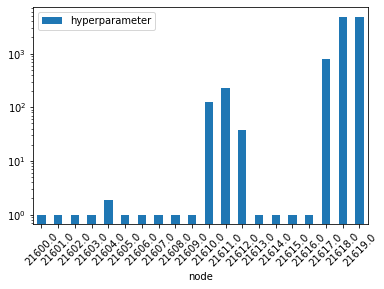

In [73]:
# ax = hdf.hist( column =, bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
#ax = agents_merged.plot.bar(x='node', y='hyperparameter', rot=45, )
b = actions_nonmedial.plot.bar(x='node', y='hyperparameter', rot=45, )
b.set_yscale('log')
b.xlabel('node number')
#c = actions_merged.plot.bar(x='node', y='hyperparameter', rot=45, )


## plot 2) correlation coefficient per node

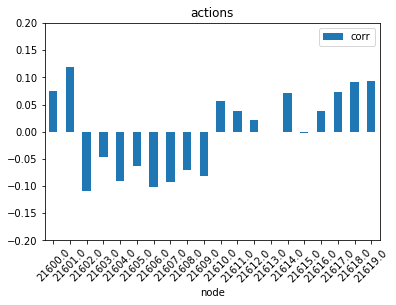

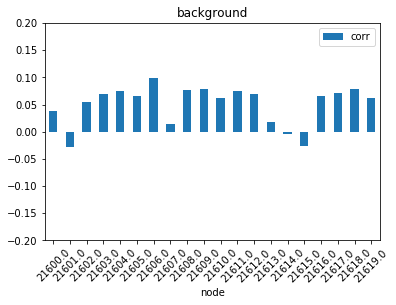

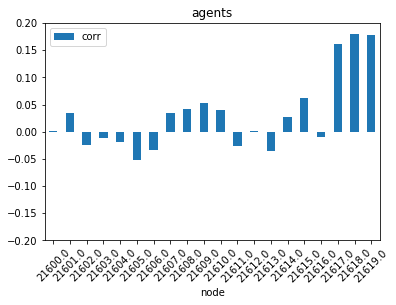

In [74]:
ax = actions_nonmedial.plot.bar(x='node', y='corr', title = 'actions', rot=45, ylim = (-0.20,0.20))
ax = bg_nonmedial.plot.bar(x='node', y='corr',title = 'background', rot=45, ylim = (-0.20,0.20))
ax = agents_nonmedial.plot.bar(x='node', y='corr', title = 'agents',rot=45, ylim = (-0.20,0.20))


## plot 3) stacked

In [35]:
actions_nonmedial['feature'] = 'action'
bg_nonmedial['feature'] = 'background'
agents_nonmedial['feature'] = 'agent'
stack_df = pd.concat([actions_nonmedial, bg_nonmedial, agents_nonmedial])
#sdf =  stack_df.rename({0:'node', 1:'correlation'}, axis = 'columns')

In [36]:
stack_df.head()

,node,corr,hyperparameter,feature
0,21600.0,0.074512,1.000000,action
1,21601.0,0.119475,1.000000,action
2,21602.0,-0.109195,1.000000,action
3,21603.0,-0.047017,1.000000,action
4,21604.0,-0.091397,1.832981,action


Text(0, 0.5, 'frequency')

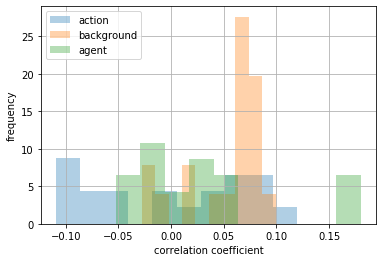

In [72]:
# https://stackoverflow.com/questions/48238305/bar-plot-with-groupby

for g in pd.unique(stack_df['feature']):
    stack_df.loc[stack_df['feature']==g,'corr'].hist(alpha=0.35,
                                             label=g,density=True)
plt.legend(loc='upper left')
plt.xlabel('correlation coefficient')
plt.ylabel('frequency')


# sdf.groupby('feature')['correlation'].hist(bins=10, alpha=0.65, density=True, label=g)

## relationship between hyperparameter and correlation coefficient

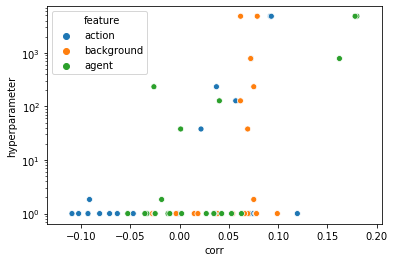

In [70]:
# ax2 = stack_df.plot.scatter(x='hyperparameter',
#                       y='corr',
#                       c='feature',
#                       colormap='viridis')

# g =sns.scatterplot(x="hyperparameter", y="corr",
#               hue="feature",
#               data=stack_df);
# g.set_xscale('log')
# # g.set(xscale="log");


y =sns.scatterplot(x="corr", y="hyperparameter",
              hue="feature",
              data=stack_df);
y.set_yscale('log')